## 1)Reading the dataset & understand the features and target variable

In [1]:
#importing pandas library for reading the dataset
import pandas as pd

In [2]:
qual_bank=pd.read_csv('Qualitative_Bankruptcy.data.txt',names=['Industrial Risk','Management Risk','Financial Flexibility','Credibility','Competitiveness','Operating Risk','Class'])
qual_bank.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


The Class is a categorical variable consisting of 2 categories as Bankruptcy or Non-Bankruptcy which is the target variable that our model will predict just like human experts predict based on the other set of variables.Hence Class will be the target variable.

## 2)Seperating the data into dependent & independent features

In [3]:
#x will be the set of independent features/variable
x=qual_bank.iloc[:,0:6]
x.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk
0,P,P,A,A,A,P
1,N,N,A,A,A,N
2,A,A,A,A,A,A
3,P,P,P,P,P,P
4,N,N,P,P,P,N


In [4]:
#y will be the dependent/target variable
y=qual_bank.iloc[:,6:7]
y.head()

,Class
0,NB
1,NB
2,NB
3,NB
4,NB


## 3)Encoding independent features

In [5]:
from sklearn.preprocessing import LabelEncoder
lenc=LabelEncoder()
x=x.apply(lenc.fit_transform)

In [6]:
x

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk
0,2,2,0,0,0,2
1,1,1,0,0,0,1
2,0,0,0,0,0,0
3,2,2,2,2,2,2
4,1,1,2,2,2,1
...,...,...,...,...,...,...
245,1,1,0,1,1,1
246,2,1,1,1,1,1
247,0,1,1,1,1,1
248,1,1,1,1,1,1


In [11]:
x=pd.get_dummies(x,columns=x.columns)
x

,Industrial Risk_0,Industrial Risk_1,Industrial Risk_2,Management Risk_0,Management Risk_1,Management Risk_2,Financial Flexibility_0,Financial Flexibility_1,Financial Flexibility_2,Credibility_0,Credibility_1,Credibility_2,Competitiveness_0,Competitiveness_1,Competitiveness_2,Operating Risk_0,Operating Risk_1,Operating Risk_2
0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1
1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
2,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
3,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
4,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0
246,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
247,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
248,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0


Encoding the dependent feature as well since it's categorical & for the model of regression to understand the dataset it has to be in numerical form 

In [12]:
y.iloc[:,0]=lenc.fit_transform(y.iloc[:,0])

D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [13]:
y

,Class
0,1
1,1
2,1
3,1
4,1
...,...
245,0
246,0
247,0
248,0


## 4)Splitting the dataset into training & test set

In [14]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12345)

In [15]:
print("The shape of x_train is:",x_train.shape)
print("The shape of y_train is:",y_train.shape)
print("The shape of x_test is:",x_test.shape)
print("The shape of y_test is:",y_test.shape)

The shape of x_train is: (200, 18)
The shape of y_train is: (200, 1)
The shape of x_test is: (50, 18)
The shape of y_test is: (50, 1)


## 5)Applying PCA on the independent features of the train data

In [16]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x_train_std=std.fit_transform(x_train)
x_test_std=std.fit_transform(x_test)

In [17]:
from sklearn.decomposition import PCA

In [18]:
pca=PCA(random_state=12345)
pca.fit(x_train_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=12345,
    svd_solver='auto', tol=0.0, whiten=False)

In [19]:
pca.n_components_

18

## 6)Displaying elbow plot to find the reduced number of dimensions

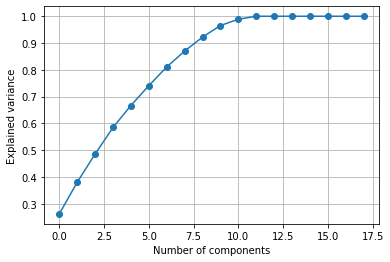

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
plt.plot(range(0,pca.n_components_),np.cumsum(pca.explained_variance_ratio_),marker='o')
plt.xlabel("Number of components")
plt.ylabel("Explained variance")
plt.grid()
plt.show()

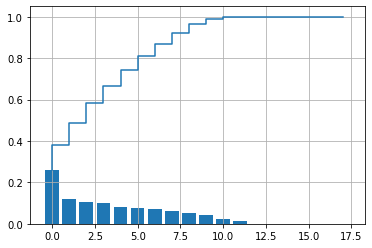

In [21]:
plt.step(range(0,pca.n_components_),np.cumsum(pca.explained_variance_ratio_))
plt.bar(range(0,pca.n_components_),pca.explained_variance_ratio_)
plt.grid()

10 components seems to be represnting 90% of the data hence they seems to be the required principal component.

## 7)Transforming the data using PCA

In [62]:
pca=PCA(n_components=10,random_state=12345)
x_train_std_pca=pca.fit_transform(x_train_std)

In [63]:
x_train_std_pca=pd.DataFrame(x_train_std_pca)

## 8)Applying KMeans algorithm on the above transformed data

In [64]:
cluster_errors=[]
distortion=[]

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial import distance
#importing cluster of diff. sizes to check for erros
cluster_range=range(1,10)

for i in cluster_range:
    clusters=KMeans(i,n_init=5)
    clusters.fit(x_train_std_pca)
    labels=clusters.labels_
    centroids=clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
    distortion.append(sum(np.min(distance.cdist(x_train_std_pca, centroids, 'euclidean'), axis=1))/ x_train_std_pca.shape[0])
    
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df.head(10)

,num_clusters,cluster_errors
0,1,3475.393375
1,2,2632.816767
2,3,2358.270757
3,4,2211.459237
4,5,1986.106288
5,6,1844.091662
6,7,1724.834899
7,8,1617.345662
8,9,1548.935483


## 9)Selecting optimal number of clusters & forming clusters out of train data

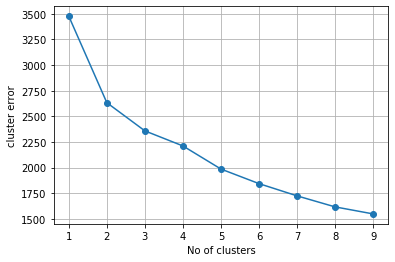

In [65]:
plt.plot(clusters_df.num_clusters,clusters_df.cluster_errors,marker='o')
plt.xlabel('No of clusters')
plt.ylabel('cluster error')
plt.grid()

4 seems to be optimal number of clusters

In [66]:
finalclusters=KMeans(n_clusters=4,n_init=4)
finalclusters.fit(x_train_std_pca)
labels=finalclusters.labels_

In [67]:
x_train_std_pca

,0,1,2,3,4,5,6,7,8,9
0,2.134214,-0.319978,-1.361100,1.562808,0.085764,-1.811120,-1.167633,-0.477127,0.059051,0.868368
1,1.862059,-0.484865,0.169737,-2.603051,1.364461,-0.827302,-0.456877,-0.780913,-0.950436,-0.708922
2,-0.567225,-1.847852,-0.293183,-1.613688,-2.315484,-0.017622,2.289386,0.603597,0.817742,-0.210604
3,2.075016,-1.284581,0.789884,-0.930569,-1.794389,0.529445,-0.120086,0.017031,0.373042,-0.111263
4,-0.452854,-2.359235,1.092952,-1.249425,-1.014174,0.060225,0.739082,2.296367,1.814015,-0.302169
...,...,...,...,...,...,...,...,...,...,...
195,2.210393,1.215315,0.114431,2.586103,0.265582,0.016335,0.854923,-0.150725,0.450192,-1.040578
196,-2.274264,2.739307,-0.744888,-1.647316,-1.169480,-0.586966,1.519706,1.066075,0.451261,-0.779035
197,-1.591740,-1.891149,2.473452,0.196862,-1.097478,1.876858,-0.909942,0.732887,-0.257146,-1.161752
198,2.131036,2.462874,-0.071297,0.942158,0.065596,1.678458,0.320869,0.077434,1.002024,-0.103804


## 10)Creating a new column in the train data & populating it with the cluster labels

In [68]:
x_train_std_pca['clusterlabels']=labels

In [69]:
x_train_std_pca

,0,1,2,3,4,5,6,7,8,9,clusterlabels
0,2.134214,-0.319978,-1.361100,1.562808,0.085764,-1.811120,-1.167633,-0.477127,0.059051,0.868368,1
1,1.862059,-0.484865,0.169737,-2.603051,1.364461,-0.827302,-0.456877,-0.780913,-0.950436,-0.708922,1
2,-0.567225,-1.847852,-0.293183,-1.613688,-2.315484,-0.017622,2.289386,0.603597,0.817742,-0.210604,0
3,2.075016,-1.284581,0.789884,-0.930569,-1.794389,0.529445,-0.120086,0.017031,0.373042,-0.111263,1
4,-0.452854,-2.359235,1.092952,-1.249425,-1.014174,0.060225,0.739082,2.296367,1.814015,-0.302169,0
...,...,...,...,...,...,...,...,...,...,...,...
195,2.210393,1.215315,0.114431,2.586103,0.265582,0.016335,0.854923,-0.150725,0.450192,-1.040578,1
196,-2.274264,2.739307,-0.744888,-1.647316,-1.169480,-0.586966,1.519706,1.066075,0.451261,-0.779035,2
197,-1.591740,-1.891149,2.473452,0.196862,-1.097478,1.876858,-0.909942,0.732887,-0.257146,-1.161752,3
198,2.131036,2.462874,-0.071297,0.942158,0.065596,1.678458,0.320869,0.077434,1.002024,-0.103804,1


## 11)Transforming the test data using the same PCA object that was fit on the train dataset

In [70]:
pca=PCA(n_components=10,random_state=12345)
x_test_std_pca=pca.fit_transform(x_test_std)

In [71]:
x_test_std_pca=pd.DataFrame(x_test_std_pca)
x_test_std_pca.shape

(50, 10)

## 12)Using the same KMeans object,assigning cluster labels to the test data & storing it as feature

In [72]:
finalclusters1=KMeans(n_clusters=4,n_init=4)
finalclusters1.fit(x_test_std_pca)
labels1=finalclusters1.labels_
labels1.shape

(50,)

In [73]:
x_test_std_pca['clusterlabels']=labels1
x_test_std_pca

,0,1,2,3,4,5,6,7,8,9,clusterlabels
0,1.834406,-2.380792,0.287359,0.363900,0.369164,-0.251817,-0.816550,-0.618174,-0.658956,0.354136,3
1,-1.117731,0.666599,-2.914666,-0.465985,0.268380,-0.823830,0.056815,-0.757270,0.138434,-0.198622,2
2,-2.350801,1.256853,-0.013936,-0.511773,0.826746,2.788968,-1.712314,1.466074,-0.071193,-0.668132,2
3,0.660822,2.044217,0.896492,0.803700,0.827940,-0.999143,-0.936160,0.652198,1.363591,1.480930,0
4,-0.204967,2.530693,0.819583,2.983373,0.033986,0.564680,-0.365461,1.549403,-1.018786,0.263012,0
5,-3.047071,0.668202,1.871665,-1.321017,1.062238,-1.650009,-0.285792,0.350628,-1.345822,-0.009566,2
6,1.951658,-0.389495,-0.895866,-0.600532,1.671608,0.116795,0.454527,-0.241063,-0.718291,2.122493,3
7,-1.119947,-1.677556,-1.103625,1.415116,1.286141,1.391175,0.327576,0.309483,1.823303,-1.278752,1
8,2.757726,0.100829,1.672796,-0.155526,0.987604,-0.993789,0.653986,-0.310323,1.171788,0.143482,3
9,1.949041,-0.258079,-0.089742,1.934246,-0.746472,-0.368553,2.329066,1.215387,0.177118,-0.875553,3


## 13)Applying classification model on the train dataset & predicting the target for the test dataset

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
logreg=LogisticRegression()
logreg.fit(x_train_std_pca,y_train)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
y_pred=logreg.predict(x_test_std_pca)

## 14)Checking Accuracy & confusion matrix of Logistic regression

In [77]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
scorecard=accuracy_score(y_test,y_pred)
print("Accuracy is :%.3f"%scorecard)
f1_score=classification_report(y_test,y_pred)
print("The following is the f1_score:")
print(f1_score)
conf_mat=confusion_matrix(y_test,y_pred)
print("The following is the confusion matrix:")
print(conf_mat)

Accuracy is :0.920
The following is the f1_score:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91        21
           1       0.96      0.90      0.93        29

    accuracy                           0.92        50
   macro avg       0.92      0.92      0.92        50
weighted avg       0.92      0.92      0.92        50

The following is the confusion matrix:
[[20  1]
 [ 3 26]]


## Applying Naive Bayes model on the train dataset & predicting the target for the test dataset

In [78]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train_std_pca,y_train)

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [79]:
y_pred3=nb.predict(x_test_std_pca)

## Checking Accuracy & confusion matrix of Naive Bayes

In [80]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
scorecard=accuracy_score(y_test,y_pred3)
print("Accuracy is :%.3f"%scorecard)
f1_score=classification_report(y_test,y_pred3)
print("The following is the f1_score:")
print(f1_score)
conf_mat=confusion_matrix(y_test,y_pred3)
print("The following is the confusion matrix:")
print(conf_mat)

Accuracy is :0.580
The following is the f1_score:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.58      1.00      0.73        29

    accuracy                           0.58        50
   macro avg       0.29      0.50      0.37        50
weighted avg       0.34      0.58      0.43        50

The following is the confusion matrix:
[[ 0 21]
 [ 0 29]]


D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Applying Decision tree model on the train dataset & predicting the target for the test dataset

3)Decision tree Classifier

In [81]:
from sklearn.tree import DecisionTreeClassifier

In [82]:
dtc=DecisionTreeClassifier(criterion='entropy')

In [83]:
dtc.fit(x_train_std_pca,y_train)
y_pred4=dtc.predict(x_test_std_pca)

## Checking Accuracy & confusion matrix of Decision Tree

In [84]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
scorecard=accuracy_score(y_test,y_pred4)
print("Accuracy is :%.3f"%scorecard)
f1_score=classification_report(y_test,y_pred4)
print("The following is the f1_score:")
print(f1_score)
conf_mat=confusion_matrix(y_test,y_pred4)
print("The following is the confusion matrix:")
print(conf_mat)

Accuracy is :0.980
The following is the f1_score:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.97      0.98        29

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

The following is the confusion matrix:
[[21  0]
 [ 1 28]]


## Applying Random Forest Classifier model on the train dataset & predicting the target for the test dataset

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
rfc=RandomForestClassifier(max_depth=80,random_state=12345)
rfc.fit(x_train_std_pca,y_train)
y_pred5=rfc.predict(x_test_std_pca)

D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


## Checking Accuracy & confusion matrix of Random Forest Classifier

In [89]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
scorecard=accuracy_score(y_test,y_pred5)
print("Accuracy is :%.3f"%scorecard)
f1_score=classification_report(y_test,y_pred5)
print("The following is the f1_score:")
print(f1_score)
conf_mat=confusion_matrix(y_test,y_pred5)
print("The following is the confusion matrix:")
print(conf_mat)

Accuracy is :0.960
The following is the f1_score:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.97      0.97      0.97        29

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50

The following is the confusion matrix:
[[20  1]
 [ 1 28]]


Conclusion:-The Decision Tree is a better predictor than any other classification models.The PCA has shown the reduction of dimensions & with clustering the data into an optimal of 6 clusters the data can more accurately predict for whether the provided features can lead to classification as to what factor leads to bankruptcy or non-bankruptcy.